A little notebook to help visualise the official results for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

Data manually copied from: https://de.wikipedia.org/wiki/COVID-19-Fälle_in_Deutschland

In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
rki = pd.read_csv('rki_manual.csv', header=None, skiprows=2, index_col=[0])
rki.columns = pd.date_range(start='2020-02-24', periods=len(rki.columns), freq='D')
rki = rki.T
rki.columns.name = None

In [4]:
rki.tail()

,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Deutschland,increase
2020-03-12,454.0,500.0,137.0,30.0,38.0,88.0,99.0,23.0,129.0,688.0,52.0,14.0,45.0,27.0,31.0,14.0,2369.0,802.0
2020-03-13,454.0,558.0,174.0,44.0,42.0,99.0,148.0,33.0,230.0,936.0,102.0,40.0,83.0,42.0,48.0,29.0,3062.0,693.0
2020-03-14,569.0,681.0,216.0,61.0,50.0,158.0,203.0,45.0,253.0,1154.0,121.0,40.0,93.0,45.0,60.0,46.0,3795.0,733.0
2020-03-15,827.0,886.0,265.0,84.0,53.0,162.0,286.0,50.0,287.0,1407.0,168.0,32.0,130.0,47.0,103.0,51.0,4838.0,1043.0
2020-03-16,1105.0,1067.0,300.0,94.0,56.0,260.0,342.0,51.0,391.0,1541.0,325.0,85.0,140.0,77.0,123.0,55.0,6012.0,1174.0


In [5]:
# choose a random list of federal states to plot
plot_de = [
    'Hamburg',
    'Bremen',
    'Berlin',
    'Bayern',
    'Nordrhein-Westfalen'
]

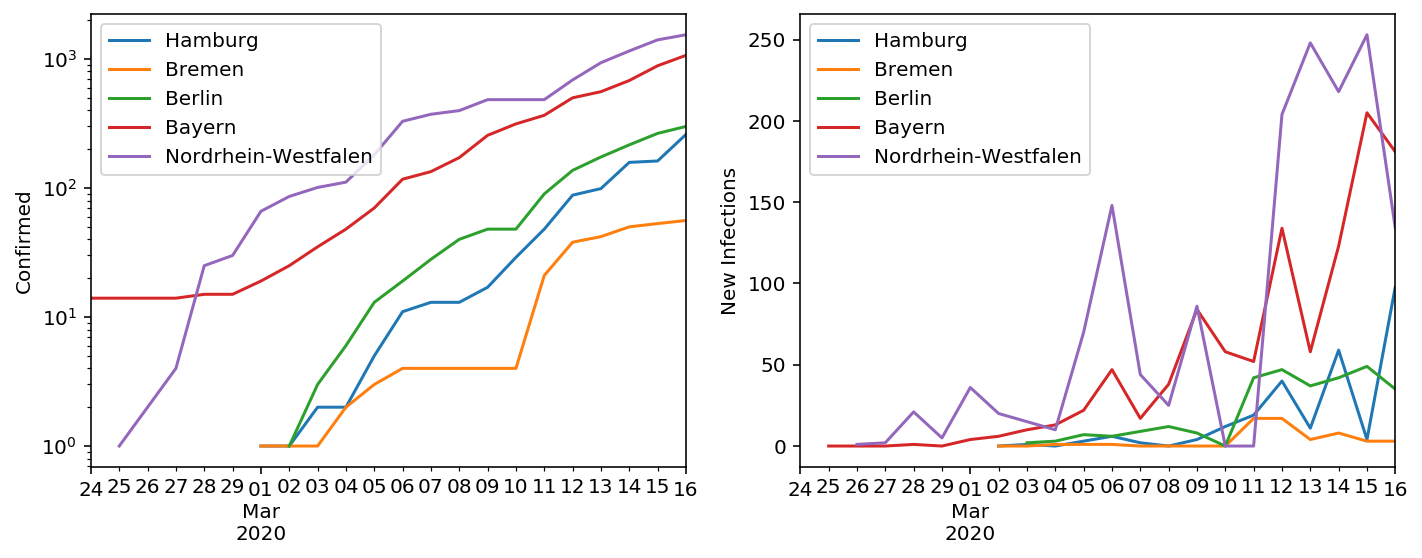

In [6]:
plt.close(2)
fig, ax = plt.subplots(ncols=2, figsize=(10,4), sharex=True, num=2)
rki[plot_de].plot(ax=ax[0], logy=True) 
rki[plot_de].diff().plot(ax=ax[1], logy=False)

ax[0].set_ylabel('Confirmed')
ax[1].set_ylabel('New Infections')

fig.tight_layout()

In [7]:
# save the above figure
#fig.savefig('sars-covid-19_timeseries_de.png')